In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [3]:
X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)



In [4]:
class_names=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

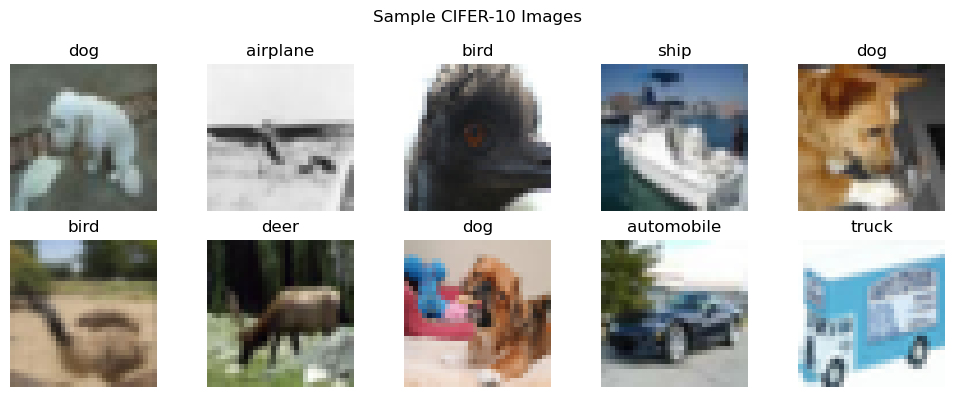

In [5]:
plt.figure(figsize=(10, 4))
for i in range(10):
    indx=np.random.randint(0, X_train.shape[0])
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[indx])
    plt.title(class_names[np.argmax(y_train[indx])])
    plt.axis("off")
plt.suptitle("Sample CIFER-10 Images")
plt.tight_layout()
plt.show()

In [6]:
inputs= Input(shape=(32,32,3))
x=Conv2D(32, (3,3), activation="relu", name="conv1")(inputs)
x=MaxPooling2D((2,2), name='pool1')(x)

x=Conv2D(64,(3,3), activation="relu", name="conv2")(x)
x=MaxPooling2D((2,2), name="pooling")(x)

x=Conv2D(128, (3,3), activation="relu", name="conv3")(x)
x=MaxPooling2D((2,2), name="pool3")(x)

x= Flatten(name="Flatten")(x)
x=Dense(128, activation='relu', name="dense1")(x)

outputs=Dense(10, activation="softmax", name="output")(x)

model=Model(inputs, outputs)

In [7]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling (MaxPooling2D)               │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool3 (MaxPooling2D)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history=model.fit(X_train, y_train, epochs=20, batch_size=128,validation_split=0.2 , verbose=1)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 90ms/step - accuracy: 0.2862 - loss: 1.9161 - val_accuracy: 0.4840 - val_loss: 1.4386
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.5039 - loss: 1.3765 - val_accuracy: 0.5596 - val_loss: 1.2462
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.5751 - loss: 1.1939 - val_accuracy: 0.5975 - val_loss: 1.1589
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.6170 - loss: 1.0918 - val_accuracy: 0.6181 - val_loss: 1.0833
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.6516 - loss: 0.9886 - val_accuracy: 0.6404 - val_loss: 1.0439
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.6760 - loss: 0.9288 - val_accuracy: 0.6600 - val_loss: 0.9862
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.6937 - loss: 0.8747 - val_accuracy: 0.6728 - val_loss: 0.9541
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.7173 - loss: 0.8124 - 

In [10]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Loss:", loss)
print("accuracy:", accuracy)

Loss: 0.45676878094673157
accuracy: 0.8557999730110168


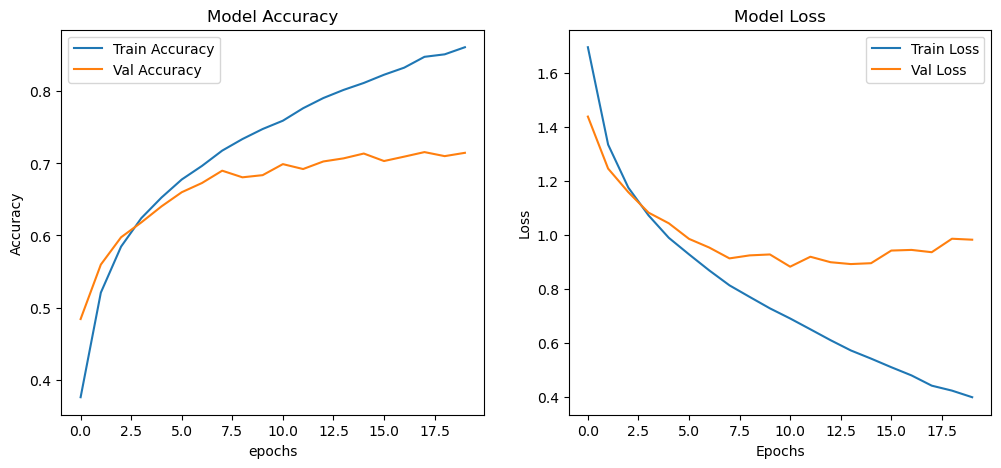

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
y_pred_probs= model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


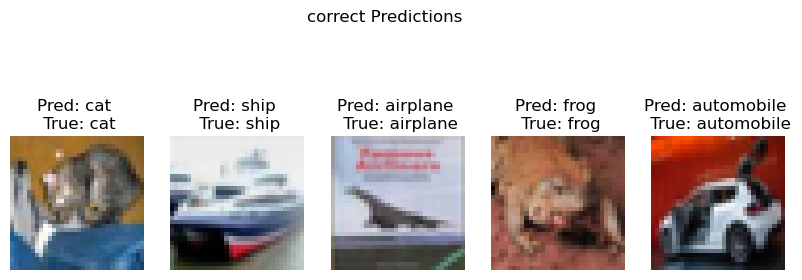

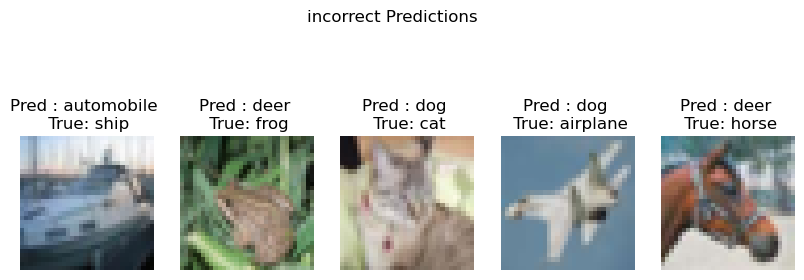

In [13]:
correct = np.where(y_pred == y_true)[0]
incorrect = np.where(y_pred != y_true)[0]

plt.figure(figsize=(10, 4))
for i , indx in enumerate(correct[:5]):
    plt.subplot(1,5, i+1)
    plt.imshow(X_test[indx])
    plt.title(f"Pred: {class_names[y_pred[indx]]} \n True: {class_names[y_true[indx]]}")
    plt.axis("off")

plt.suptitle("correct Predictions")
plt.show()


plt.figure(figsize=(10, 4))
for i ,indx in enumerate(incorrect[:5]):
    plt.subplot(1,5, i+1)
    plt.imshow(X_test[indx])
    plt.title(f"Pred : {class_names[y_pred[indx]]} \n True: {class_names[y_true[indx]]}")
    plt.axis("off")
plt.suptitle("incorrect Predictions ")
plt.show()

In [14]:
layer_outputs = [layer.output for layer in model.layers if "conv" in layer.name or "pool" in layer.name]
activation_model = Model(inputs= model.input, outputs=layer_outputs)

In [15]:
sample_img = X_test[12].reshape(1, 32,32, 3)
activations=activation_model.predict(sample_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


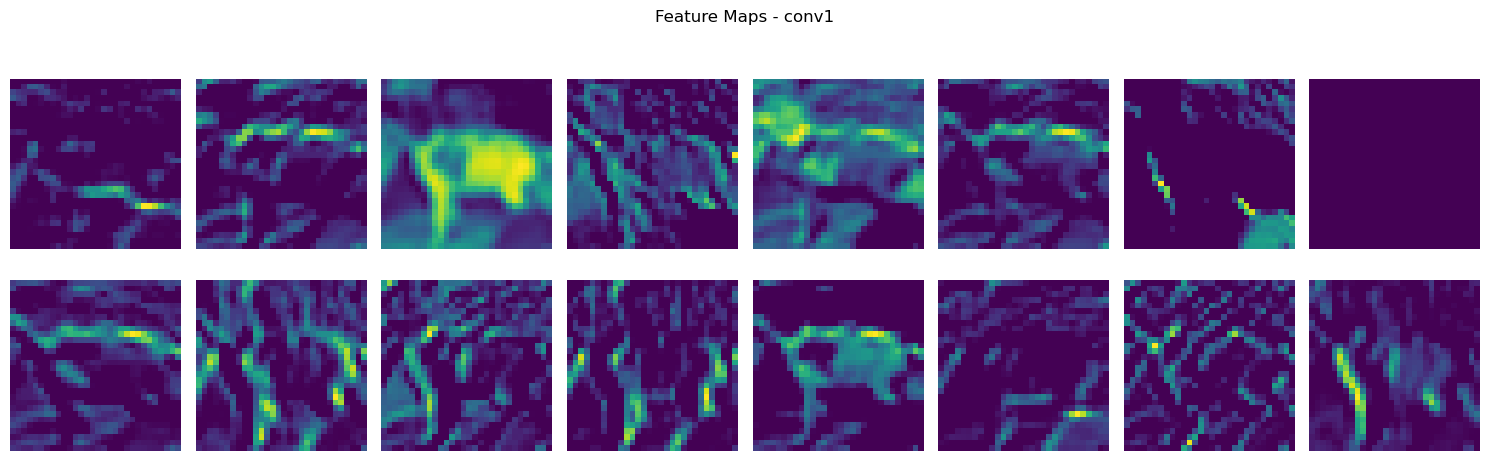

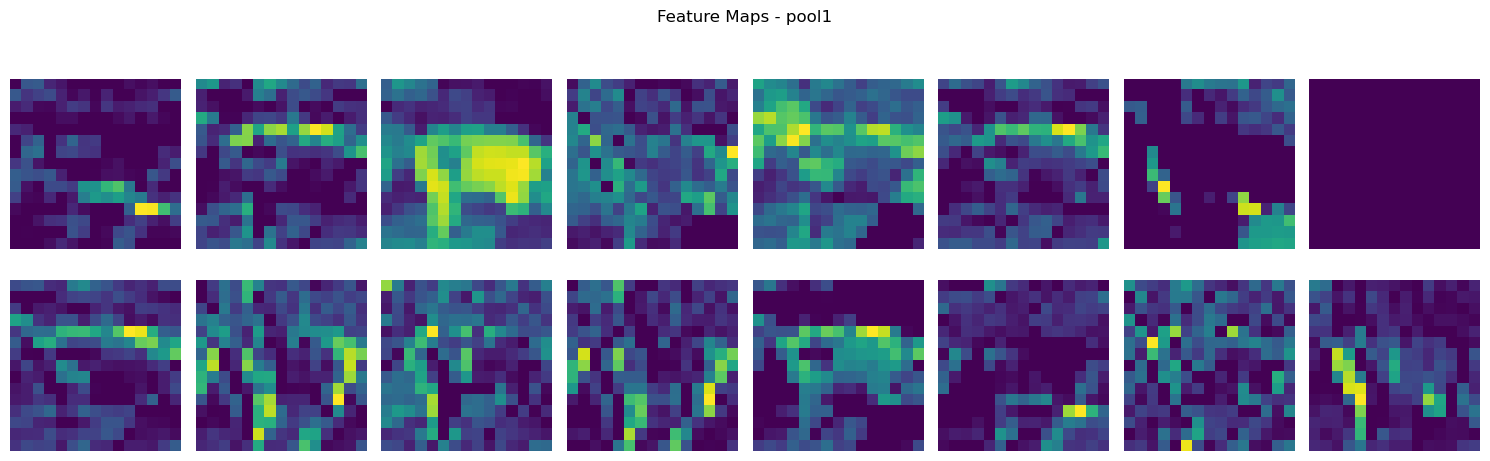

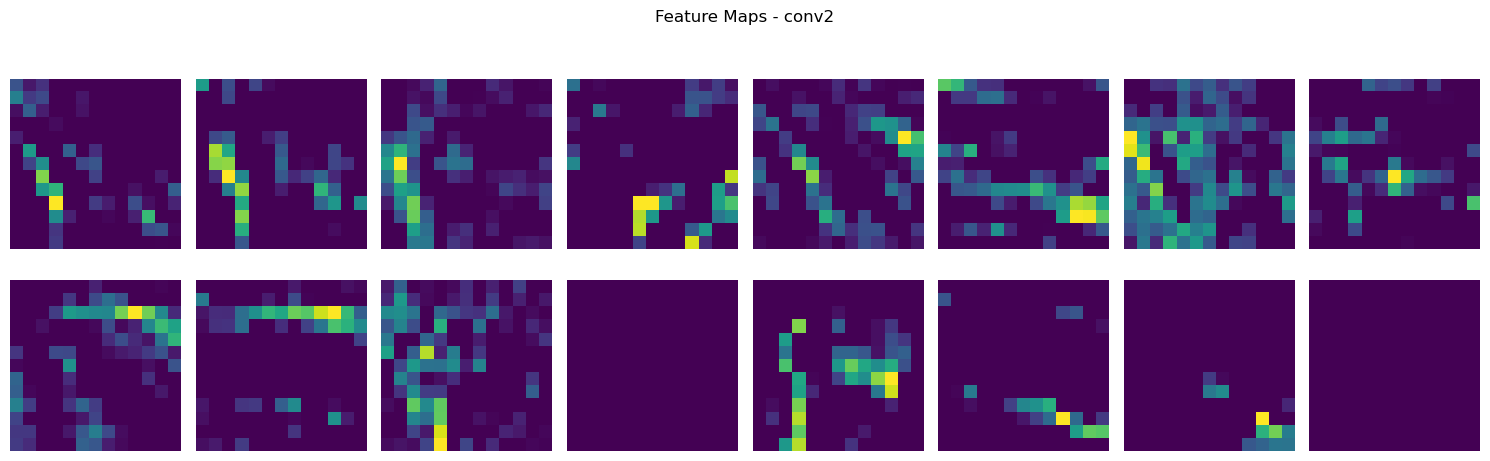

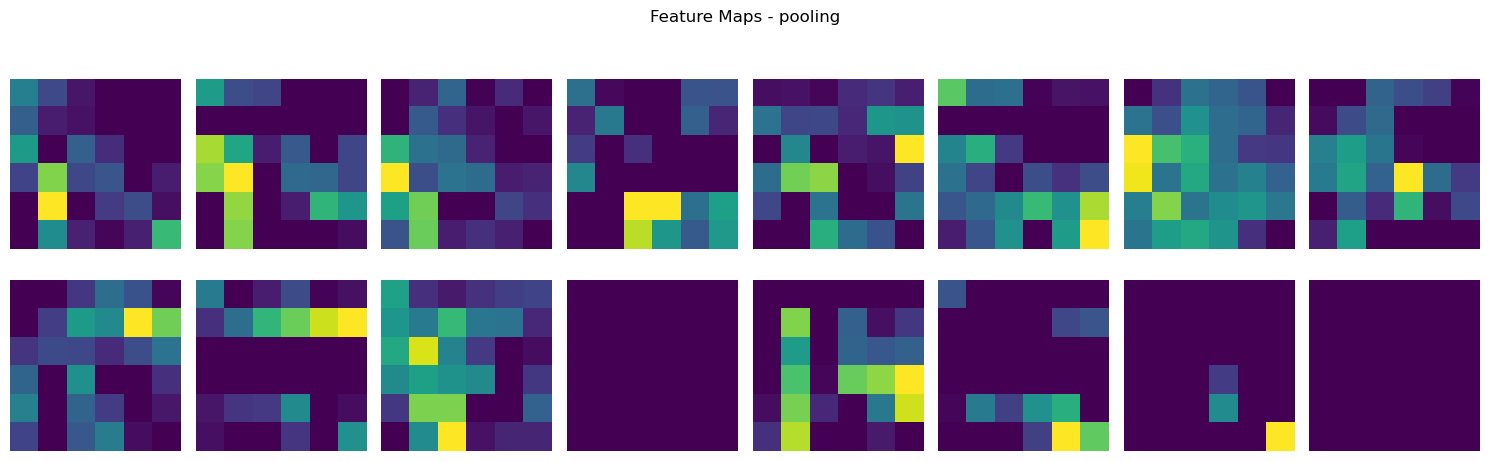

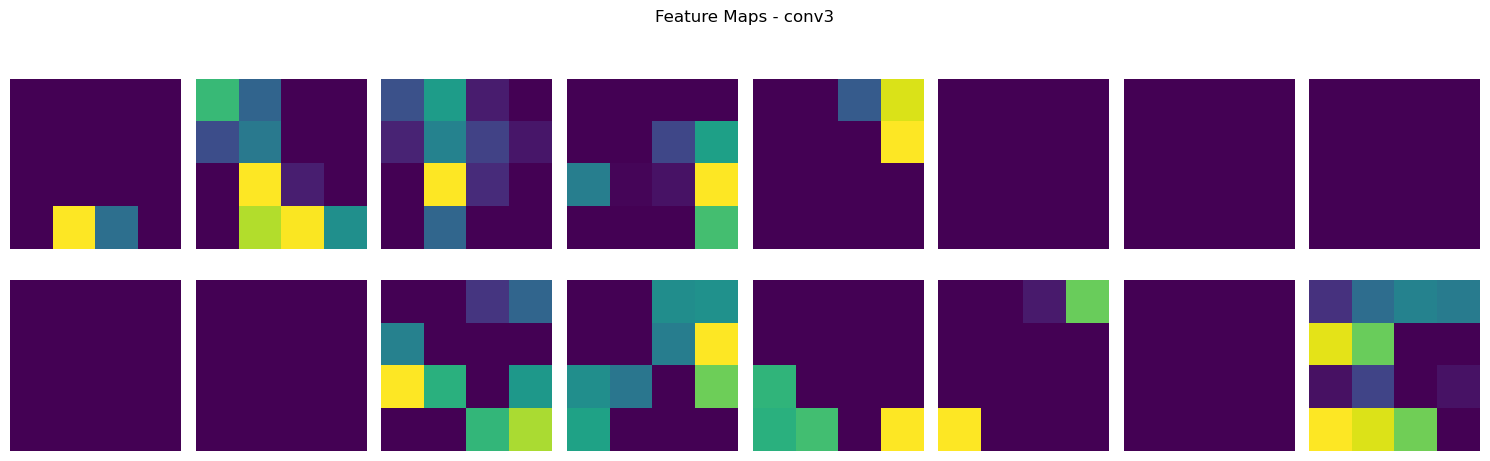

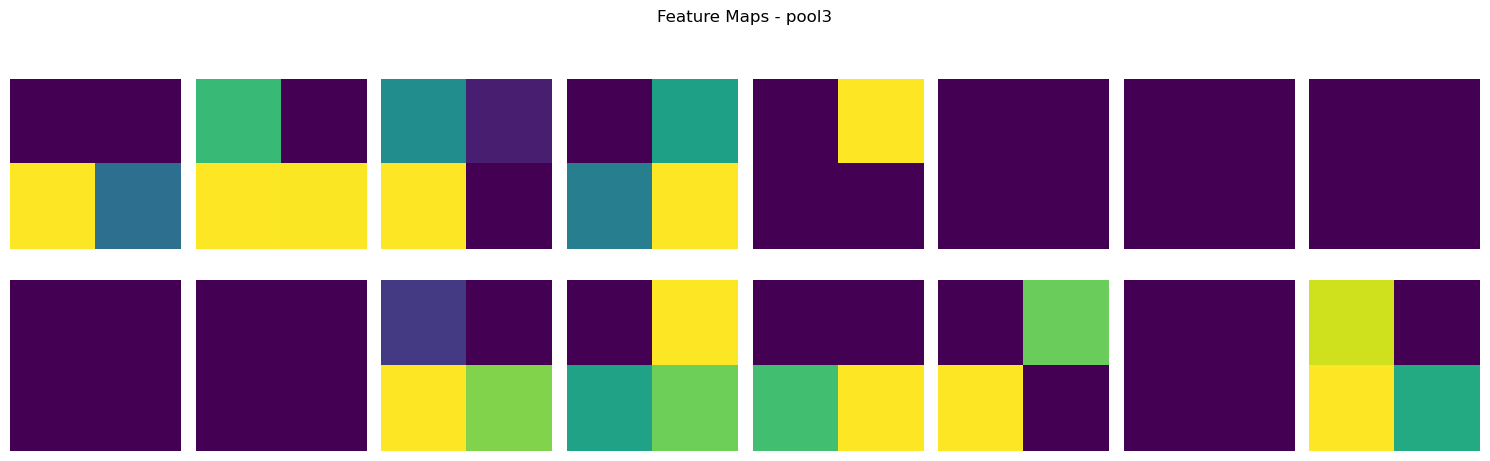

In [16]:
for layer_activation , layer in zip(activations, activation_model.layers[1:]):
    num_features=layer_activation.shape[-1]
    size = layer_activation.shape[-1]

    plt.figure(figsize=(15, 5))
    for i in range(min(16, num_features)):
        plt.subplot(2, 8, i+1)
        plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
        plt.axis("off")
    plt.suptitle(f"Feature Maps - {layer.name}")
    plt.tight_layout()
    plt.show()

# Rock Paper Scissor

In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten , Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
(ds_train_full, ds_test), ds_info = tfds.load(
    "rock_paper_scissors",
    split=['train', 'test'],
    as_supervised=True,
    with_info =True
)

In [19]:
val_size=int(0.2 * ds_info.splits['train'].num_examples)
ds_train = ds_train_full.skip(val_size)
ds_val = ds_train_full.take(val_size)

class_names= ds_info.features['label'].names
print("classes :" , class_names)

classes : ['rock', 'paper', 'scissors']


In [20]:
IMG_SIZE = 150
BATCH_SIZE = 32
NUM_CLASSES = 3

def preprocess(image, label):
    image= tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255.0
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label
train_aug = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_data = ds_val.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    

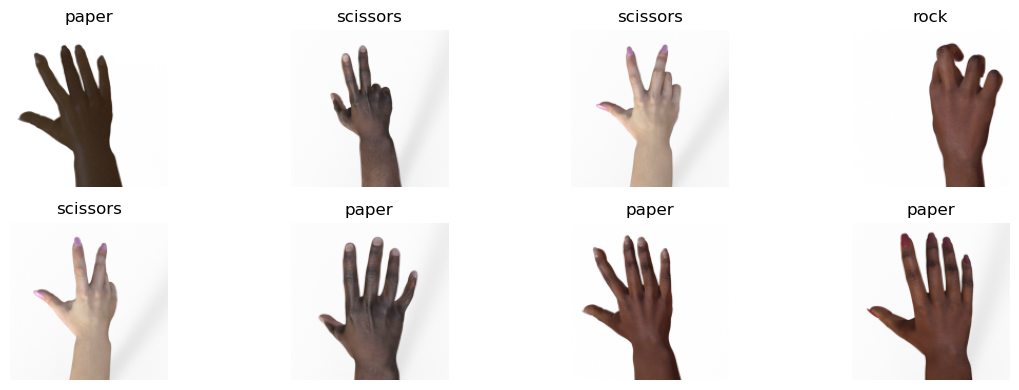

In [21]:
for images , labels in train_aug.take(1):
    plt.figure(figsize=(12, 4))
    for i in range(8):
        plt.subplot(2,4, i+1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [22]:
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x= Conv2D(32, (3,3), activation = "relu", name= "conv1")(inputs)
x=MaxPooling2D((2,2), name= "pool1")(x)

x= Conv2D(64, (3,3), activation = "relu", name= "conv2")(x)
x=MaxPooling2D((2,2), name= "pool2")(x)

x= Conv2D(128, (3,3), activation = "relu", name= "conv3")(x)
x=MaxPooling2D((2,2), name= "pool3")(x)

x= Flatten(name="Flatten")(x)
x=Dense(128, activation='relu', name='dense1')(x)
x=Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax', name='output')(x)


In [23]:
model= Model(inputs , outputs)

In [24]:
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(
    train_aug, 
    epochs=15, 
    validation_data = val_data,
    callbacks= [EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=1)


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 794ms/step - accuracy: 0.5539 - loss: 0.9990 - val_accuracy: 0.9782 - val_loss: 0.0849
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 766ms/step - accuracy: 0.9820 - loss: 0.0614 - val_accuracy: 0.9960 - val_loss: 0.0166
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 774ms/step - accuracy: 0.9912 - loss: 0.0213 - val_accuracy: 0.9940 - val_loss: 0.0161
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 792ms/step - accuracy: 0.9967 - loss: 0.0158 - val_accuracy: 0.9960 - val_loss: 0.0091
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 789ms/step - accuracy: 0.9958 - loss: 0.0098 - val_accuracy: 0.9960 - val_loss: 0.0050
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 807ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9960 - val_loss: 0.0070
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 786ms/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 791ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accu

In [26]:
loss, acc = model.evaluate(test_data , verbose=0)
print(f" Test Accuracy: {acc:.4f}")

 Test Accuracy: 0.8333


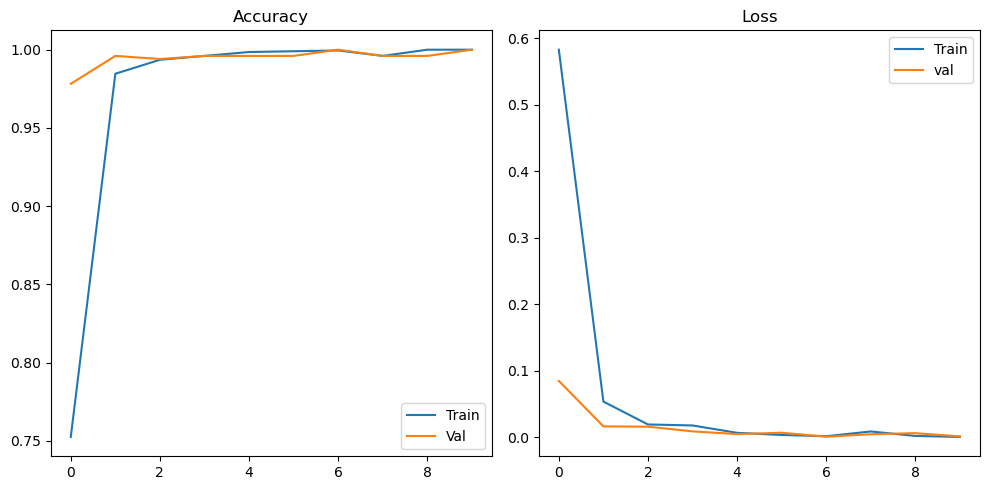

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
for img_batch, _ in test_data.take(1):
    img = img_batch[0].numpy()
    break
intermediate_model = Model(inputs = model.input, outputs=[
    model.get_layer("conv1").output,
    model.get_layer("conv2").output,
    model.get_layer("conv3").output
])


In [29]:
feature_maps = intermediate_model.predict(img.reshape(1, IMG_SIZE, IMG_SIZE, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


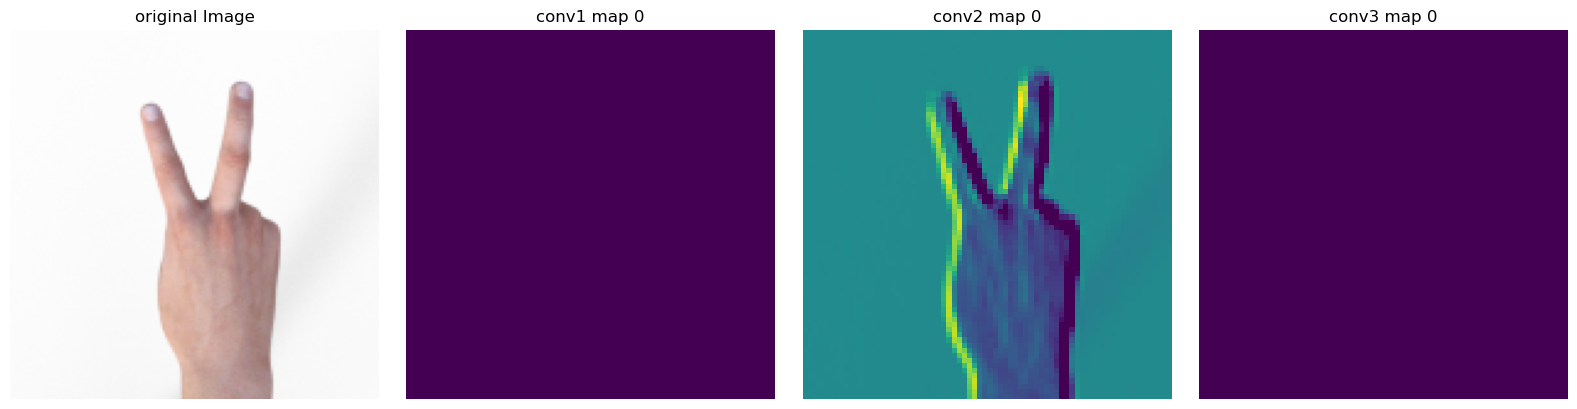

In [30]:
plt.figure(figsize=(16, 4))

plt.subplot(1,4,1)
plt.imshow(img)
plt.title("original Image")
plt.axis("off")

for i , fmap in enumerate(feature_maps):
    plt.subplot(1,4,i+2)
    plt.imshow(fmap[0,:, :, 0], cmap="viridis")
    plt.title(f"conv{i+1} map 0")
    plt.axis("off")
plt.tight_layout()
plt.show()